# China's Coal Import Quotas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

In [ ]:
plt.style.use('mds.mplstyle')

## Sources

Sources:
- Mentions Mongolia's flour import quota - [Mongolian Economy](https://mongolianeconomy.mn/en/iskander-azizov/?mc_cid=fcf14274b5&mc_eid=723326a57c)
- Mongolia passes Australia as largest coking coal suppier - [GlobalTimes](https://www.globaltimes.cn/content/1204846.shtml)
- Mongolian Green Channel in September - [yqqlm](https://www.yqqlm.com/2020/07/china-mongolia-border-portgreen-channel-recently-started-operation-the-ministry-of-foreign-affairs-responded/)
- China orders to stop buying Australian coal - [Financial Review](https://www.afr.com/world/asia/china-orders-some-steelmakers-to-stop-buying-australian-coal-traders-20201013-p564hs)
- China increases coal quota (thermal) but leaves Australia out - [The Guardian](https://www.theguardian.com/world/2020/nov/28/china-increases-coal-import-quotas-but-australia-likely-to-be-excluded)
- Analyst says early 2020 slowdown had nothing to do with COVID - [China Macro Economy](https://www.scmp.com/economy/china-economy/article/3110572/china-could-face-mongolia-coal-import-shortage-amid)
- **Specifically mentions slowdown at the end of the year** - [Argus](https://www.argusmedia.com/en/news/2064083-chinese-coking-coal-imports-rise-by-153pc-in-2019?mc_cid=1f9728d1ea&mc_eid=723326a57c)
- COVID caused decrease in exports - [ZGM](https://zgm.mn/coal-export-falls-at-major-ports-as-china-s-import-slumps/?mc_cid=1f9728d1ea&mc_eid=723326a57c)
- Truck line is 10km long - [News.mn](https://news.mn/en/789843/?mc_cid=113b6a9ec2&mc_eid=723326a57c)
- Mongolian economy contribution from mining - [Bloomberg](http://bloombergtv.mn/%D1%82%D3%A9%D1%81%D0%B2%D0%B8%D0%B9%D0%BD-%D0%B7%D0%B0%D1%80%D0%BB%D0%B0%D0%B3%D1%8B%D0%BD-%D3%A9%D1%81%D3%A9%D0%BB%D1%82-%D0%BE%D1%80%D0%BB%D0%BE%D0%B3%D1%8B%D0%BD-%D3%A9%D1%81%D3%A9%D0%BB%D1%82%D3%A9%D3%A9%D1%81-4-%D0%BF%D1%83%D0%BD%D0%BA%D1%82%D1%8D%D1%8D%D1%80-%D3%A9%D0%BD%D0%B4%D3%A9%D1%80-%D0%B1%D0%B0%D0%B9%D0%BD%D0%B0/?cid=3)
- WTO regulations against quantitative restrictions - [WTO](https://www.wto.org/english/tratop_e/markacc_e/qr_e.htm)

Data source for China import data: http://43.248.49.97/indexEn

## Import Data

Import data that was collected from the General Administration of Customs ([interactive tables link](http://43.248.49.97/indexEn)). We will use 2 datasets:
- Coal imports from Mongolia and Australia (01-2018 to 10-2020)
- Total coking coal imports for 2019 (monthly)

In [ ]:
coal = pd.read_csv('coal_imports_china.csv', thousands=',')

In [ ]:
coking_coal = pd.read_csv('coking_coal_china.csv', thousands=',')

In [ ]:
coal.head()

,Date of data\t,Commodity code\t,Commodity\t,Trading partner code\t,Trading partner\t,Quantity\t,Unit\t
0,202003,27011210,"Bituminous coking coal, not agglomerated\t",124,Mongolia\t,49580090,Kilogram\t
1,202004,27011210,"Bituminous coking coal, not agglomerated\t",124,Mongolia\t,775241530,Kilogram\t
2,202005,27011210,"Bituminous coking coal, not agglomerated\t",124,Mongolia\t,1707866600,Kilogram\t
3,202006,27011210,"Bituminous coking coal, not agglomerated\t",124,Mongolia\t,2094031782,Kilogram\t
4,202007,27011210,"Bituminous coking coal, not agglomerated\t",124,Mongolia\t,2202018384,Kilogram\t


In [ ]:
coking_coal.head()

,Date of data\t,Commodity code\t,Commodity\t,Quantity\t,Unit\t
0,201901,27011210,"Bituminous coking coal, not agglomerated\t",7354347949,Kilogram\t
1,201902,27011210,"Bituminous coking coal, not agglomerated\t",2902950494,Kilogram\t
2,201903,27011210,"Bituminous coking coal, not agglomerated\t",6040473002,Kilogram\t
3,201904,27011210,"Bituminous coking coal, not agglomerated\t",7417825279,Kilogram\t
4,201905,27011210,"Bituminous coking coal, not agglomerated\t",5901030562,Kilogram\t


## Data Cleaning

Let's do some data cleaning:
- Remove the extra \t characters. 
- Reformat dates to be actually dates.

In [ ]:
coal = coal.replace(to_replace='\t', value='', regex=True)

In [ ]:
coal.columns = ['Date of data', 'Commodity code', 'Commodity',
       'Trading partner code', 'Trading partner', 'Quantity', 'Unit']

In [ ]:
coal['Date of data'] = pd.to_datetime(coal['Date of data'], format='%Y%m')

In [ ]:
coal.head()

,Date of data,Commodity code,Commodity,Trading partner code,Trading partner,Quantity,Unit
0,2020-03-01,27011210,"Bituminous coking coal, not agglomerated",124,Mongolia,49580090,Kilogram
1,2020-04-01,27011210,"Bituminous coking coal, not agglomerated",124,Mongolia,775241530,Kilogram
2,2020-05-01,27011210,"Bituminous coking coal, not agglomerated",124,Mongolia,1707866600,Kilogram
3,2020-06-01,27011210,"Bituminous coking coal, not agglomerated",124,Mongolia,2094031782,Kilogram
4,2020-07-01,27011210,"Bituminous coking coal, not agglomerated",124,Mongolia,2202018384,Kilogram


In [ ]:
coal.dtypes

Date of data            datetime64[ns]
Commodity code                   int64
Commodity                       object
Trading partner code             int64
Trading partner                 object
Quantity                         int64
Unit                            object
dtype: object

In [ ]:
coking_coal = coking_coal.replace(to_replace='\t', value='', regex=True)

In [ ]:
coking_coal.columns = ['Date of data', 'Commodity code', 'Commodity', 'Quantity',
       'Unit']

In [ ]:
coking_coal['Date of data'] = pd.to_datetime(coking_coal['Date of data'], format='%Y%m')

In [ ]:
coking_coal.head()

,Date of data,Commodity code,Commodity,Quantity,Unit
0,2019-01-01,27011210,"Bituminous coking coal, not agglomerated",7354347949,Kilogram
1,2019-02-01,27011210,"Bituminous coking coal, not agglomerated",2902950494,Kilogram
2,2019-03-01,27011210,"Bituminous coking coal, not agglomerated",6040473002,Kilogram
3,2019-04-01,27011210,"Bituminous coking coal, not agglomerated",7417825279,Kilogram
4,2019-05-01,27011210,"Bituminous coking coal, not agglomerated",5901030562,Kilogram


In [ ]:
coking_coal.dtypes

Date of data      datetime64[ns]
Commodity code             int64
Commodity                 object
Quantity                   int64
Unit                      object
dtype: object

## Visualization

### Australian vs Mongolian Coal Exports to China

In [ ]:
total_country = coal.groupby(by=['Trading partner','Date of data']).sum().reset_index()

In [ ]:
australia = total_country[total_country['Trading partner'] == 'Australia']

In [ ]:
mongolia = total_country[total_country['Trading partner'] == 'Mongolia']

In [ ]:
australia.head()

,Trading partner,Date of data,Commodity code,Trading partner code,Quantity
0,Australia,2019-01-01,54022500,1202,10640223804
1,Australia,2019-02-01,54022500,1202,3166352980
2,Australia,2019-03-01,54022500,1202,4249817242
3,Australia,2019-04-01,54022500,1202,5761444832
4,Australia,2019-05-01,54022500,1202,5231079382


In [ ]:
mongolia.head()

,Trading partner,Date of data,Commodity code,Trading partner code,Quantity
22,Mongolia,2018-01-01,81034400,372,1838761200
23,Mongolia,2018-02-01,81034400,372,1261574500
24,Mongolia,2018-03-01,81034400,372,3041886120
25,Mongolia,2018-04-01,81034400,372,3353555369
26,Mongolia,2018-05-01,81034400,372,3988952691


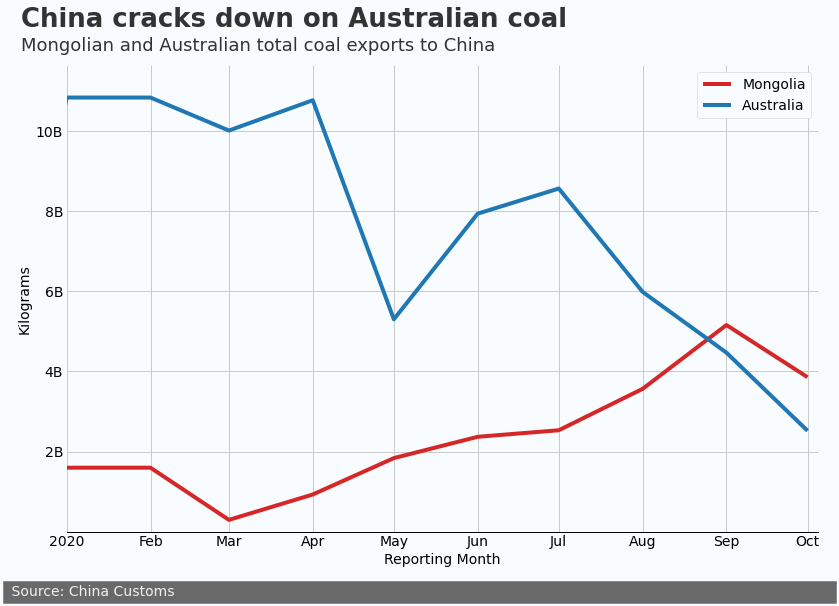

In [ ]:
fig, ax = plt.subplots()

# Plot data and label axes
ax.plot(mongolia['Date of data'], mongolia['Quantity'] / 1000000000,label='Mongolia', color='tab:red')
ax.plot(australia['Date of data'], australia['Quantity'] / 1000000000, label='Australia', color='tab:blue')
ax.set_xlabel('Reporting Month')
ax.set_ylabel("Kilograms")

# Set ticks
ax.set_yticks(np.arange(0, 12, 2))
ax.set_yticklabels(['','2B','4B','6B','8B','10B'])
ax.set_ylim(bottom=0)
ax.set_xlim(left=datetime.date(2020, 1, 1))
ax.set_xlim(right=datetime.date(2020, 10, 5))

# Make pretty dates
locator = mdates.AutoDateLocator(minticks=3, maxticks=12)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Title and subtitle
ax.text(x = datetime.date(2019, 12, 15), y = 12.6, s = 'China cracks down on Australian coal', fontsize=26, weight='bold', alpha=.8)
ax.text(x = datetime.date(2019, 12, 15), y = 12, s = 'Mongolian and Australian total coal exports to China', fontsize=18, alpha=.8)

# Set bottom banner
ax.text(x = datetime.date(2019, 12, 10), y = -1.6, s = ' Source: China Customs                                                                                                                                                  ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')

# Set Legend
ax.legend(framealpha=1)

plt.savefig('two-big-players.png', dpi = 300, bbox_inches="tight")

### Percentage of Coking Coal

We don't need a chart for this, just some numbers. 

In [ ]:
coal

,Date of data,Commodity code,Commodity,Trading partner code,Trading partner,Quantity,Unit
0,2020-03-01,27011210,"Bituminous coking coal, not agglomerated",124,Mongolia,49580090,Kilogram
1,2020-04-01,27011210,"Bituminous coking coal, not agglomerated",124,Mongolia,775241530,Kilogram
2,2020-05-01,27011210,"Bituminous coking coal, not agglomerated",124,Mongolia,1707866600,Kilogram
3,2020-06-01,27011210,"Bituminous coking coal, not agglomerated",124,Mongolia,2094031782,Kilogram
4,2020-07-01,27011210,"Bituminous coking coal, not agglomerated",124,Mongolia,2202018384,Kilogram
...,...,...,...,...,...,...,...
140,2018-08-01,27011900,"Other coal, not agglomerated, nes",124,Mongolia,295712400,Kilogram
141,2018-09-01,27011900,"Other coal, not agglomerated, nes",124,Mongolia,474611960,Kilogram
142,2018-10-01,27011900,"Other coal, not agglomerated, nes",124,Mongolia,329983150,Kilogram
143,2018-11-01,27011900,"Other coal, not agglomerated, nes",124,Mongolia,480981050,Kilogram


In [ ]:
mongolian_exports = coal[coal['Trading partner'] == 'Mongolia'].groupby(by=['Date of data','Commodity']).sum().reset_index().pivot(index='Date of data', columns='Commodity',values='Quantity')

In [ ]:
mongolian_exports['Total'] = coal[coal['Trading partner'] == 'Mongolia'].groupby(by='Date of data').sum()['Quantity']

In [ ]:
mongolian_exports['Coking Coal %'] = mongolian_exports['Bituminous coking coal, not agglomerated'] / mongolian_exports['Total'] * 100

Here is the average percentage of coal being exported to China from Mongolia that is coking coal.

In [ ]:
mongolian_exports['Bituminous coking coal, not agglomerated'].sum() / mongolian_exports['Total'].sum()

0.8515217257307697

In [ ]:
mongolian_exports['Coking Coal %'].mean()

83.5415248258141

In [ ]:
australian_exports = coal[coal['Trading partner'] == 'Australia'].groupby(by=['Date of data','Commodity']).sum().reset_index().pivot(index='Date of data', columns='Commodity',values='Quantity')

In [ ]:
australian_exports['Total'] = coal[coal['Trading partner'] == 'Australia'].groupby(by='Date of data').sum()['Quantity']

In [ ]:
australian_exports['Bituminous coking coal, not agglomerated'].sum() / australian_exports['Total'].sum()

0.4281580308433345

In [ ]:
australian_exports['Coking Coal %'] = australian_exports['Bituminous coking coal, not agglomerated'] / australian_exports['Total'] * 100

Only 42% of Australia's coal export to China is coking coal. 

In [ ]:
australian_exports['Coking Coal %'].mean()

42.583031352052984

### Coking Coal

In [ ]:
coking_mongolia = coal[(coal['Trading partner'] == 'Mongolia') & (coal['Commodity'] == 'Bituminous coking coal, not agglomerated')][['Date of data','Quantity']]

In [ ]:
coking_mongolia = coking_mongolia.rename(columns={'Quantity':'Mongolia'})

In [ ]:
coking_australia = coal[(coal['Trading partner'] == 'Australia') & (coal['Commodity'] == 'Bituminous coking coal, not agglomerated')][['Date of data','Quantity']]

In [ ]:
coking_australia = coking_australia.rename(columns={'Quantity':'Australia'})

In [ ]:
coking_coal = coking_coal.merge(coking_mongolia, how='left', on='Date of data')

In [ ]:
coking_coal = coking_coal.merge(coking_australia, how='left', on='Date of data')

In [ ]:
coking_coal['Mongolian %'] = coking_coal['Mongolia'] / coking_coal['Quantity'] * 100

In [ ]:
coking_coal['Australian %'] = coking_coal['Australia'] / coking_coal['Quantity'] * 100

In [ ]:
coking_coal['Other %'] = 100 - (coking_coal['Mongolian %'] + coking_coal['Australian %'])

In [ ]:
coking_coal = coking_coal.sort_values('Date of data')

In [ ]:
coking_coal.head()

,Date of data,Commodity code,Commodity,Quantity,Unit,Mongolia,Australia,Mongolian %,Australian %,Other %
0,2019-01-01,27011210,"Bituminous coking coal, not agglomerated",7354347949,Kilogram,2088395041,4315651554,28.396740,58.681634,12.921626
1,2019-02-01,27011210,"Bituminous coking coal, not agglomerated",2902950494,Kilogram,1427451044,1148183480,49.172421,39.552293,11.275286
2,2019-03-01,27011210,"Bituminous coking coal, not agglomerated",6040473002,Kilogram,3264099580,2129821622,54.037152,35.259186,10.703662
3,2019-04-01,27011210,"Bituminous coking coal, not agglomerated",7417825279,Kilogram,3685119704,2708304506,49.679246,36.510762,13.809992
4,2019-05-01,27011210,"Bituminous coking coal, not agglomerated",5901030562,Kilogram,3531928827,1366768952,59.852746,23.161530,16.985724


In [ ]:
coking_coal.head()

,Date of data,Commodity code,Commodity,Quantity,Unit,Mongolia,Australia,Mongolian %,Australian %,Other %
0,2019-01-01,27011210,"Bituminous coking coal, not agglomerated",7354347949,Kilogram,2088395041,4315651554,28.396740,58.681634,12.921626
1,2019-02-01,27011210,"Bituminous coking coal, not agglomerated",2902950494,Kilogram,1427451044,1148183480,49.172421,39.552293,11.275286
2,2019-03-01,27011210,"Bituminous coking coal, not agglomerated",6040473002,Kilogram,3264099580,2129821622,54.037152,35.259186,10.703662
3,2019-04-01,27011210,"Bituminous coking coal, not agglomerated",7417825279,Kilogram,3685119704,2708304506,49.679246,36.510762,13.809992
4,2019-05-01,27011210,"Bituminous coking coal, not agglomerated",5901030562,Kilogram,3531928827,1366768952,59.852746,23.161530,16.985724


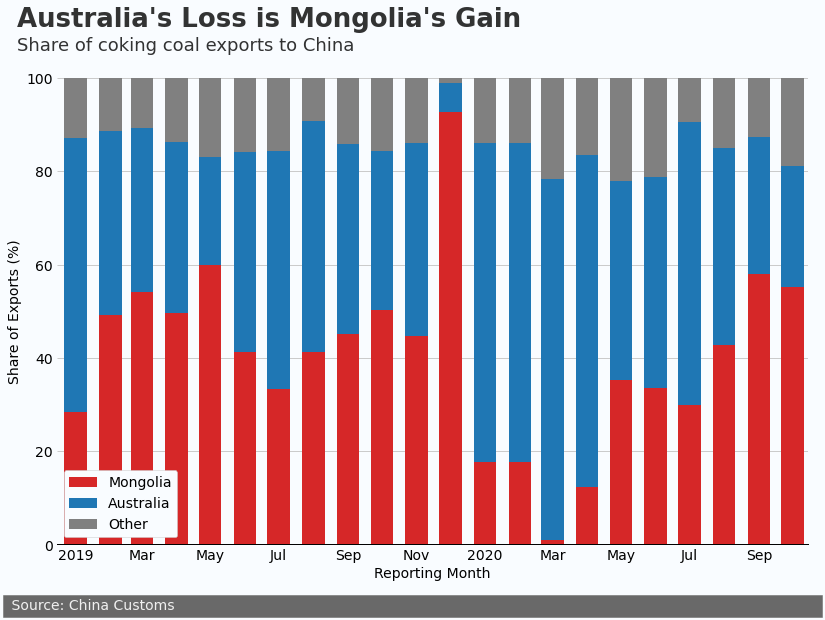

In [ ]:
fig, ax = plt.subplots()

# Make the base plot
width = 20
ax.bar(coking_coal['Date of data'], coking_coal['Mongolian %'],  width=width, label='Mongolia', color='tab:red')
ax.bar(coking_coal['Date of data'], coking_coal['Australian %'], width=width, label='Australia', bottom=coking_coal['Mongolian %'], color='tab:blue')
ax.bar(coking_coal['Date of data'], coking_coal['Other %'],  width=width, label='Other', bottom=coking_coal['Australian %'] + coking_coal['Mongolian %'], color='grey')

# Set labels
ax.set_xlabel('Reporting Month')
ax.set_ylabel("Share of Exports (%)")

# Make pretty dates
locator = mdates.AutoDateLocator(minticks=3, maxticks=12)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

ax.set_ylim(top=100)
ax.set_xlim(left=datetime.date(2018, 12, 15), right=datetime.date(2020, 10, 15))

# Title and subtitle
ax.text(x = datetime.date(2018, 11, 10), y = 111, s = "Australia's Loss is Mongolia's Gain", fontsize=26, weight='bold', alpha=.8)
ax.text(x = datetime.date(2018, 11, 10), y = 106, s = 'Share of coking coal exports to China', fontsize=18, alpha=.8)

# Set bottom banner
ax.text(x = datetime.date(2018, 11, 1), y = -14, s = ' Source: China Customs                                                                                                                                               ', fontsize = 14, color = '#f0f0f0', backgroundcolor = 'dimgrey')


ax.legend(loc='lower left', framealpha=1)

plt.savefig('australia-loss.png', dpi = 300, bbox_inches="tight")